# **USDA Food Database**

*Chú thích: Nên chạy notebook theo thứ tự để tránh phát sinh lỗi không mong muốn*

Tổng quan:

Người dùng có thể truy cập dữ liệu này thông qua đường liên kết đến github: https://github.com/wesm/pydata-book

**Clone dataset từ github: https://github.com/wesm/pydata-book**

In [1]:
!git clone https://github.com/wesm/pydata-book.git

Cloning into 'pydata-book'...
remote: Enumerating objects: 558, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 558 (delta 24), reused 7 (delta 4), pack-reused 525 (from 1)
Receiving objects: 100% (558/558), 63.76 MiB | 12.29 MiB/s, done.
Resolving deltas: 100% (210/210), done.
Updating files: 100% (209/209), done.


## 1. TRUY CẬP DỮ LIỆU

**Import thư viện**

In [3]:
import json
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

**Get dataset**

In [5]:
db = json.load(open('/content/pydata-book/datasets/usda_food/database.json'))

In [6]:
len(db)

6636

## 2. KHAI PHÁ VÀ PHÂN TÍCH DỮ LIỆU

- Mỗi bộ trong db là một dictionary bao gồm toàn bộ dữ liệu của 1 loại đồ ăn. Với "nutrients" là một miền với danh sách các dictionaries.

In [7]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [8]:
db[0]["nutrients"][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [9]:
nutrients = pd.DataFrame(db[0]["nutrients"])

nutrients.head(7)

value units                  description        group
0    25.18     g                      Protein  Composition
1    29.20     g            Total lipid (fat)  Composition
2     3.06     g  Carbohydrate, by difference  Composition
3     3.28     g                          Ash        Other
4   376.00  kcal                       Energy       Energy
5    39.28     g                        Water  Composition
6  1573.00    kJ                       Energy       Energy

**Lấy dữ liệu tên thức ăn/nhóm/id/nhà sản xuất**

In [10]:
info_keys = ["description", "group", "id", "manufacturer"]

info = pd.DataFrame(db, columns=info_keys)

info.head()

description                   group    id  \
0                     Cheese, caraway  Dairy and Egg Products  1008   
1                     Cheese, cheddar  Dairy and Egg Products  1009   
2                        Cheese, edam  Dairy and Egg Products  1018   
3                        Cheese, feta  Dairy and Egg Products  1019   
4  Cheese, mozzarella, part skim milk  Dairy and Egg Products  1028   

  manufacturer  
0               
1               
2               
3               
4

In [11]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


- Dựa trên info() ta thấy được dữ liệu bị mất ở cột nhà sản xuất

In [12]:
pd.value_counts(info["group"])[:10]

/tmp/ipython-input-3634668934.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(info["group"])[:10]


group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: count, dtype: int64

**Phân tích bộ dữ liệu Nutrients**

- Chuyển toàn bộ danh sách thức ăn vào 1 DataFrame, sau đó thêm cột id.

In [13]:
nutrients = []

for rec in db:
  fnuts = pd.DataFrame(rec["nutrients"])
  fnuts["id"] = rec["id"]
  nutrients.append(fnuts)

# concatnate with concat
nutrients = pd.concat(nutrients, ignore_index=True)

In [14]:
nutrients

value units                         description        group     id
0        25.180     g                             Protein  Composition   1008
1        29.200     g                   Total lipid (fat)  Composition   1008
2         3.060     g         Carbohydrate, by difference  Composition   1008
3         3.280     g                                 Ash        Other   1008
4       376.000  kcal                              Energy       Energy   1008
...         ...   ...                                 ...          ...    ...
389350    0.000   mcg                 Vitamin B-12, added     Vitamins  43546
389351    0.000    mg                         Cholesterol        Other  43546
389352    0.072     g        Fatty acids, total saturated        Other  43546
389353    0.028     g  Fatty acids, total monounsaturated        Other  43546
389354    0.041     g  Fatty acids, total polyunsaturated        Other  43546

[389355 rows x 5 columns]

- Loại bỏ dữ liệu trùng lặp

In [15]:
nutrients.duplicated().sum() # number of duplicates

np.int64(14179)

In [16]:
nutrients = nutrients.drop_duplicates()

- Đổi tên "group" và "description" ở 2 DataFrames

In [17]:
col_mapping = {"description" : "food", "group" : "fgroup"}

info = info.rename(columns=col_mapping, copy=False)

info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [18]:
col_mapping = {"description" : "nutrient", "group" : "nutgroup"}

nutrients = nutrients.rename(columns=col_mapping, copy=False)

nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   value     375176 non-null  float64
 1   units     375176 non-null  object 
 2   nutrient  375176 non-null  object 
 3   nutgroup  375176 non-null  object 
 4   id        375176 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB


In [19]:
nutrients

value units                            nutrient     nutgroup     id
0        25.180     g                             Protein  Composition   1008
1        29.200     g                   Total lipid (fat)  Composition   1008
2         3.060     g         Carbohydrate, by difference  Composition   1008
3         3.280     g                                 Ash        Other   1008
4       376.000  kcal                              Energy       Energy   1008
...         ...   ...                                 ...          ...    ...
389350    0.000   mcg                 Vitamin B-12, added     Vitamins  43546
389351    0.000    mg                         Cholesterol        Other  43546
389352    0.072     g        Fatty acids, total saturated        Other  43546
389353    0.028     g  Fatty acids, total monounsaturated        Other  43546
389354    0.041     g  Fatty acids, total polyunsaturated        Other  43546

[375176 rows x 5 columns]

- Merge info với nutrients

In [20]:
ndata = pd.merge(nutrients, info, on="id")

ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


In [21]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

- Tạo biểu đồ median bởi nhóm thức ăn và loại nutrient

<Axes: ylabel='fgroup'>

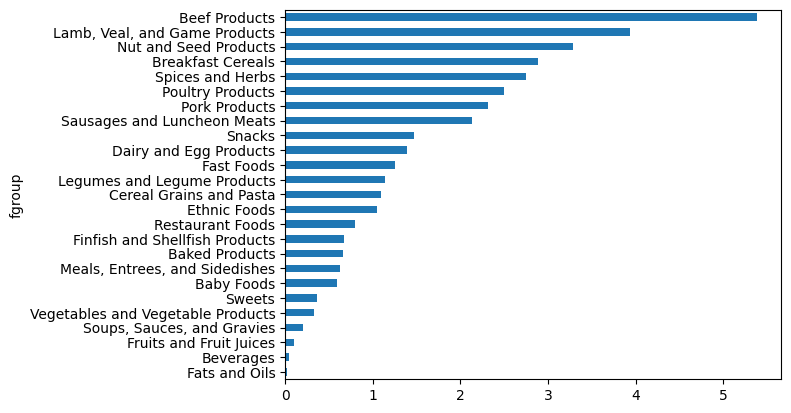

In [23]:
# visualize median values by food group and nutrient type

result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)

result["Zinc, Zn"].sort_values().plot(kind="barh")

Biểu đồ: Giá trị median zinc theo nhóm thức ăn

- Tìm giá trị thức ăn lớn nhất trong từng nutrients

In [24]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
  return x.loc[x.value.idxmax()]

max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]

/tmp/ipython-input-2025106411.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]


In [25]:
max_foods

value  \
nutgroup    nutrient                                 
Amino Acids Alanine                          8.009   
            Arginine                         7.436   
            Aspartic acid                   10.203   
            Cystine                          1.307   
            Glutamic acid                   17.452   
...                                            ...   
Vitamins    Vitamin D2 (ergocalciferol)     28.100   
            Vitamin D3 (cholecalciferol)    27.400   
            Vitamin E (alpha-tocopherol)   149.400   
            Vitamin E, added                46.550   
            Vitamin K (phylloquinone)     1714.500   

                                                                                       food  
nutgroup    nutrient                                                                         
Amino Acids Alanine                                       Gelatins, dry powder, unsweetened  
            Arginine                                           Seeds, sesame flour, low-fat  
            Aspartic acid                                               Soy protein isolate  
            Cystine                            Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                               Soy protein isolate  
...                                                                                     ...  
Vitamins    Vitamin D2 (ergocalciferol)                             Mushrooms, maitake, raw  
            Vitamin D3 (cholecalciferol)                      Fish, halibut, Greenland, raw  
            Vitamin E (alpha-tocopherol)                                    Oil, wheat germ  
            Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...  
            Vitamin K (phylloquinone)                                  Spices, sage, ground  

[94 rows x 2 columns]

---

# 2012 Federal Election Commission Database

Tổng quan:

Người dùng có thể truy cập dữ liệu này thông qua đường liên kết đến github: https://github.com/wesm/pydata-book

## 1. TRUY CẬP DỮ LIỆU

**Import thư viện**

In [26]:
import json
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

**Get dataset**

In [27]:
fec = pd.read_csv('/content/pydata-book/datasets/fec/P00000001-ALL.csv', low_memory=False)

fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [28]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

## 2. KHAI PHÁ VÀ PHÂN TÍCH DỮ LIỆU

**Lấy danh sách ứng viên chính trị**

In [29]:
unique_cands = fec["cand_nm"].unique()

unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [30]:
unique_cands[2]

'Obama, Barack'

**Tìm tổ chức thành viên theo tên ứng viên**

In [32]:
parties = {"Bachmann, Michelle": "Republican",
            "Cain, Herman": "Republican",
            "Gingrich, Newt": "Republican",
            "Huntsman, Jon": "Republican",
            "Johnson, Gary Earl": "Republican",
            "McCotter, Thaddeus G": "Republican",
            "Obama, Barack": "Democrat",
            "Paul, Ron": "Republican",
            "Pawlenty, Timothy": "Republican",
            "Perry, Rick": "Republican",
            "Roemer, Charles E. 'Buddy' III": "Republican",
            "Romney, Mitt": "Republican",
            "Santorum, Rick": "Republican"}

In [31]:
fec["cand_nm"][123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [33]:
# using mapping method
fec["cand_nm"][123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [34]:
# Add it as a column
fec["party"] = fec["cand_nm"].map(parties)

fec["party"].value_counts()

party
Democrat      593746
Republican    407985
Name: count, dtype: int64

**Tổ chức và hoàn trả (tổ chức với giá trị âm)**

In [35]:
(fec["contb_receipt_amt"] > 0).value_counts()

contb_receipt_amt
True     991475
False     10256
Name: count, dtype: int64

In [36]:
fec = fec[fec["contb_receipt_amt"] > 0]

**Lấy giá trị 2 ứng viên chính là Barack Obama và Mitt Romney**

In [37]:
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]

### **Thống kê phiếu bầu theo Occupation và Employer**

- Tính số phiếu bầu bởi Occupation (Nghề nghiệp)

In [38]:
fec["contbr_occupation"].value_counts()[:10]

contbr_occupation
RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: count, dtype: int64

- Tinh gọn các occupation trong bộ dữ liệu

In [39]:
occ_mapping = {
  "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
  "INFORMATION REQUESTED" : "NOT PROVIDED",
  "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
  "C.E.O.": "CEO"
}

def get_occ(x):
  # if no mapping provided, return x
  return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

In [41]:
emp_mapping = {
  "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
  "INFORMATION REQUESTED" : "NOT PROVIDED",
  "SELF" : "SELF-EMPLOYED",
  "SELF EMPLOYED" : "SELF-EMPLOYED",
}
def get_emp(x):
  # If no mapping provided, return x
  return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

- Tổng hợp dữ liệu party và occupation với **pivot_table**

In [42]:
by_occupation = fec.pivot_table("contb_receipt_amt", index="contbr_occupation", columns="party", aggfunc="sum")

# filter down to subset donated at least 2mil overall
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]

over_2mm

party                 Democrat   Republican
contbr_occupation                          
ATTORNEY           11141982.97   7477194.43
CEO                 2074974.79   4211040.52
CONSULTANT          2459912.71   2544725.45
ENGINEER             951525.55   1818373.70
EXECUTIVE           1355161.05   4138850.09
HOMEMAKER           4248875.80  13634275.78
INVESTOR             884133.00   2431768.92
LAWYER              3160478.87    391224.32
MANAGER              762883.22   1444532.37
NOT PROVIDED        4866973.96  20565473.01
OWNER               1001567.36   2408286.92
PHYSICIAN           3735124.94   3594320.24
PRESIDENT           1878509.95   4720923.76
PROFESSOR           2165071.08    296702.73
REAL ESTATE          528902.09   1625902.25
RETIRED            25305116.38  23561244.49
SELF-EMPLOYED        672393.40   1640252.54

<Axes: ylabel='contbr_occupation'>

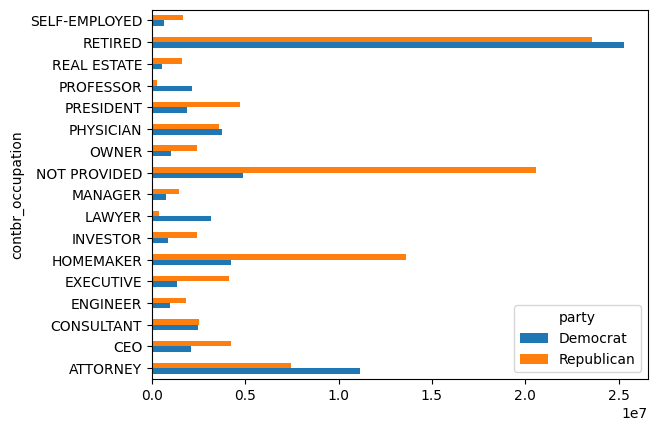

In [43]:
# total donation by party for top occupations
over_2mm.plot(kind="barh")

**Top donate cho 2 ứng viên Obama và Romney**

In [44]:
def get_top_amounts(group, key, n=5):
  totals = group.groupby(key)["contb_receipt_amt"].sum()
  return totals.nlargest(n)

In [45]:
# aggregate by occupation and employer
grouped = fec_mrbo.groupby("cand_nm")

grouped.apply(get_top_amounts, "contbr_occupation", n=7)

/tmp/ipython-input-3864892522.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_occupation", n=7)


cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                                     1968386.11
Name: contb_receipt_amt, dtype: float64

In [46]:
grouped.apply(get_top_amounts, "contbr_employer", n=10)

/tmp/ipython-input-4213707751.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_employer", n=10)


cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                              7409860.98
               STUDENT                                     496490.94
               CREDIT SUISSE                               281150.00
               MORGAN STANLEY                              267266.00
               GOLDMAN SACH & CO.                          238250.00
               BARCLAYS CAPITAL                            162750.00
               H.I.G. CAPITAL                              139500.00
Name: contb_receipt_amt, dtype: float64

**Phân loại các khoảng đóng góp**

In [47]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100_000, 1_000_000, 10_000_000])

labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)

labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] <
                                         (1000, 10000] < (10000, 100000] < (100000, 1000000] <
                                         (1000000, 10000000]]

In [48]:
# group the data for Obama and Romney by name and bin label to get histogram by donation size
grouped = fec_mrbo.groupby(["cand_nm", labels])

grouped.size().unstack(level=0)

/tmp/ipython-input-2985786989.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = fec_mrbo.groupby(["cand_nm", labels])


cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                         493            77
(1, 10]                      40070          3681
(10, 100]                   372280         31853
(100, 1000]                 153991         43357
(1000, 10000]                22284         26186
(10000, 100000]                  2             1
(100000, 1000000]                3             0
(1000000, 10000000]              4             0

--> Dữ liệu cho thấy Obama nhận về số lượng donate nhiều hơn rất nhiều so với Romney.

**Tổng hợp và chuẩn hóa lượng đóng góp theo phân loại donate của từng ứng viên**

In [49]:
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)

normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"), axis="index")

normed_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                    0.805182      0.194818
(1, 10]                   0.918767      0.081233
(10, 100]                 0.910769      0.089231
(100, 1000]               0.710176      0.289824
(1000, 10000]             0.447326      0.552674
(10000, 100000]           0.823120      0.176880
(100000, 1000000]         1.000000      0.000000
(1000000, 10000000]       1.000000      0.000000

<Axes: ylabel='contb_receipt_amt'>

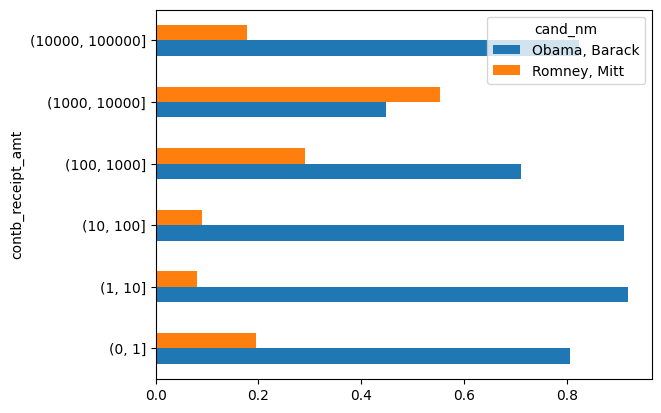

In [50]:
# visualize
normed_sums[:-2].plot(kind="barh")

**Thống kê Donation theo State**

In [51]:
# aggregate candidate data and state data

grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])

totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)

totals = totals[totals.sum(axis="columns") > 100000]

totals.head(10)

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK             281840.15      86204.24
AL             543123.48     527303.51
AR             359247.28     105556.00
AZ            1506476.98    1888436.23
CA           23824984.24   11237636.60
CO            2132429.49    1506714.12
CT            2068291.26    3499475.45
DC            4373538.80    1025137.50
DE             336669.14      82712.00
FL            7318178.58    8338458.81

**Tính phần trăm tổng Donations theo State cho từng Candidate**

In [52]:
percent = totals.div(totals.sum(axis="columns"), axis="index")

percent.head(10)

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK              0.765778      0.234222
AL              0.507390      0.492610
AR              0.772902      0.227098
AZ              0.443745      0.556255
CA              0.679498      0.320502
CO              0.585970      0.414030
CT              0.371476      0.628524
DC              0.810113      0.189887
DE              0.802776      0.197224
FL              0.467417      0.532583